Classifying the type of species of iris flowers

In [21]:
#import modin.pandas as pd
#from pandas_profiling import ProfileReport
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import (GridSearchCV, StratifiedKFold,
                                     train_test_split)
from sklearn.metrics import (accuracy_score, classification_report,
                             confusion_matrix, mean_absolute_error,
                             roc_auc_score)
from sklearn.impute import SimpleImputer
from sklearn.ensemble import (AdaBoostClassifier, RandomForestClassifier,
                              RandomForestRegressor)
import xgboost as xgb
import scipy.stats as stats
import requests
import pyforest
import cv2 as cv
import bs4 as bs
import warnings
import time
import re
import random
import os
import math
import datetime
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
# from autoviz.AutoViz_Class import AutoViz_Class

%config InlineBackend.figure_format = 'retina'

#import keras as ks
# import tensorflow as tf

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set(style='whitegrid', color_codes=True, font_scale=1.5,
        palette='plasma', font='Arial', rc={'figure.figsize': (8, 6)})


In [22]:
df = sns.load_dataset('iris')
df.head()
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.10,3.50,1.40,0.20,setosa
1,4.90,3.00,1.40,0.20,setosa
2,4.70,3.20,1.30,0.20,setosa
3,4.60,3.10,1.50,0.20,setosa
4,5.00,3.60,1.40,0.20,setosa


,sepal_length,sepal_width,petal_length,petal_width,species
145,6.70,3.00,5.20,2.30,virginica
146,6.30,2.50,5.00,1.90,virginica
147,6.50,3.00,5.20,2.00,virginica
148,6.20,3.40,5.40,2.30,virginica
149,5.90,3.00,5.10,1.80,virginica


In [23]:
y = df['species']
X = df.drop('species', axis=1)

In [24]:
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.10,3.50,1.40,0.20
1,4.90,3.00,1.40,0.20
2,4.70,3.20,1.30,0.20
3,4.60,3.10,1.50,0.20
4,5.00,3.60,1.40,0.20


In [25]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100) 

In [28]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [29]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
y_pred

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa'], dtype=object)

In [30]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

Accuracy: 1.0


In [31]:
clf.predict_proba(X_test) # probability of each class

array([[0.  , 0.99, 0.01],
       [0.96, 0.04, 0.  ],
       [0.  , 0.01, 0.99],
       [0.  , 1.  , 0.  ],
       [0.  , 0.88, 0.12],
       [1.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.07, 0.93],
       [0.  , 0.88, 0.12],
       [0.  , 1.  , 0.  ],
       [0.  , 0.03, 0.97],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.96, 0.04],
       [0.  , 0.  , 1.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.05, 0.95],
       [1.  , 0.  , 0.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  ],
       [0.  , 0.03, 0.97],
       [0.  , 0.01, 0.99],
       [0.  , 0.01, 0.99],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ]])

In [32]:
clf.predict([[5, 3, 1, 0.1]])
clf.predict_proba([[5, 3, 1, 0.1]])

array(['setosa'], dtype=object)

array([[1., 0., 0.]])

In [33]:
# Feature Importance
feature_importance = clf.feature_importances_
feature_importance

array([0.0766116 , 0.02581404, 0.46889101, 0.42868335])

In [34]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")


Accuracy: 1.0


In [35]:
# confusion matrix
confusion_matrix(y_test, y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

<AxesSubplot:>

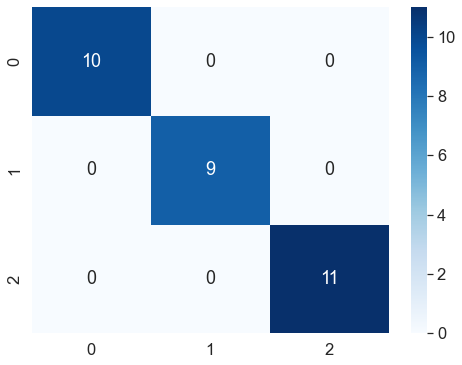

In [36]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

In [37]:
print(f"Probability that flower was setosa: {clf.predict_proba([[5, 3, 1, 0.1]])[0][0]}")
print(f"Probability that flower was versicolor: {clf.predict_proba([[5, 3, 1, 0.1]])[0][1]}")
print(f"Probability that flower was virginica: {clf.predict_proba([[5, 3, 1, 0.1]])[0][2]}")

Probability that flower was setosa: 1.0
Probability that flower was versicolor: 0.0
Probability that flower was virginica: 0.0


---
### Plotting Decision boundary classification with mlextend

In [38]:
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions

pca = PCA(n_components = 2) # Doing principal component analysis to reduce the dimensionality of the data into 2 (as only 2d plots can be made)

X_train2 = pca.fit_transform(X_train)


In [39]:
y_train=y_train.map({'setosa': 0, 'versicolor': 1, 'virginica': 2})
# y_train

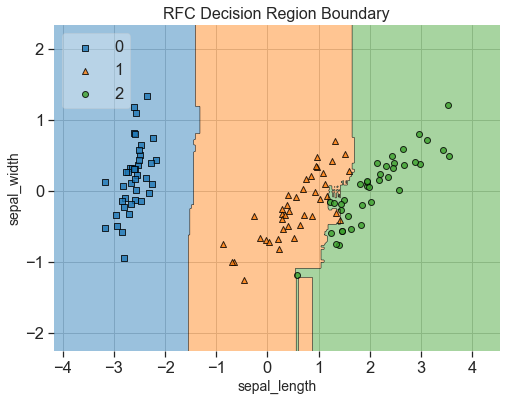

In [40]:
clf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train.values,clf=clf, legend=2) # plot_decision_reigons(X_train2, y_train.values, clf=clf, legend=2) -> (np.array,np.array,clf object,int)

plt.title('RFC Decision Region Boundary', size=16)
plt.xlabel(X.columns[0], size=14)
plt.ylabel(X.columns[1], size=14)
plt.show();